In [1]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd data

/content/drive/MyDrive/YGL/10.27/rsp/data


In [ ]:
ls

all_paper.zip  all_rock.zip  all_scissor.zip


In [1]:
#!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/all_scissor.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_scissor"
!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/all_paper.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_paper"
!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/all_rock.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_rock/"
#!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/Class 2-samples.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_scissor/classes1"
#!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/Class 1-samples.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/classes2"
#!unzip "/content/drive/MyDrive/YGL/10.27/rsp/data/Class 3-samples.zip" -d "/content/drive/MyDrive/YGL/10.27/rsp/data/all_rock/classes3"

Archive:  /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper.zip
   creating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/0.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/1.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/10.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/11.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/12.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/13.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/14.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/15.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/16.jpg  
  inflating: /content/drive/MyDrive/YGL/10.27/rsp/data/all_paper/paper (1)/17.jpg  
  inflating: /conten

In [2]:
from PIL import Image
import os, glob
def resize_images(img_path):
  image_path = os.listdir(img_path)
  print(image_path)
  for path in image_path:
    print(path)
    images = glob.glob(os.path.join(img_path,path) +"/*.jpg")
    print(len(images),"Images to be resized")
    target_size = (28,28)
    for img in images:
      old_img = Image.open(img).convert("RGB")
      new_img = old_img.resize(target_size,Image.ANTIALIAS)
      new_img.save(img,"JPEG")


In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/YGL/10.27/rsp/data/all_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

['classes1', 'scissor', 'scissor1', 'scissors-samples', 'scissors-samples2', 'scissors1']
classes1
201 Images to be resized
scissor
502 Images to be resized
scissor1
100 Images to be resized
scissors-samples
100 Images to be resized
scissors-samples2
121 Images to be resized
scissors1
104 Images to be resized
가위 이미지 resize 완료!


In [4]:
image_dir_path = "/content/drive/MyDrive/YGL/10.27/rsp/data/all_rock"
resize_images(image_dir_path)

print("주먹 이미지 resize 완료!")

['classes3', 'rock (1)', 'rock-samples', 'rock-samples2', 'rock', 'rock1']
classes3
194 Images to be resized
rock (1)
100 Images to be resized
rock-samples
100 Images to be resized
rock-samples2
89 Images to be resized
rock
491 Images to be resized
rock1
105 Images to be resized
주먹 이미지 resize 완료!


In [5]:
image_dir_path = "/content/drive/MyDrive/YGL/10.27/rsp/data/all_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

['classes2', 'paper (1)', 'paper-samples', 'paper-samples2', 'paper1', 'paper2']
classes2
192 Images to be resized
paper (1)
100 Images to be resized
paper-samples
100 Images to be resized
paper-samples2
154 Images to be resized
paper1
447 Images to be resized
paper2
102 Images to be resized
보 이미지 resize 완료!


In [6]:
import numpy as np

def load_data(img_path, number_of_data=5000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0

    paths = os.path.join(img_path + '/all_scissor')
    dirs = os.listdir(paths)
    for dir in dirs:
      for file in glob.iglob(os.path.join(paths,dir)+"/*.jpg"):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    paths = os.path.join(img_path + '/all_rock')
    dirs = os.listdir(paths)
    for dir in dirs:
      for file in glob.iglob(os.path.join(paths,dir)+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 주먹 : 1
        idx=idx+1  

    paths = os.path.join(img_path + '/all_paper')
    dirs = os.listdir(paths)
    for dir in dirs:
      for file in glob.iglob(os.path.join(paths,dir)+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs[:idx], labels[:idx]

image_dir_path = "/content/drive/MyDrive/YGL/10.27/rsp/data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3302 입니다.
x_train shape: (3302, 28, 28, 3)
y_train shape: (3302,)


라벨:  0


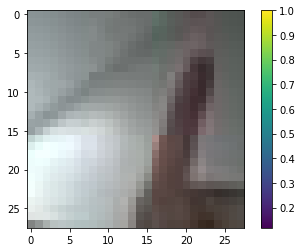

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train_norm[0])
plt.colorbar()
print('라벨: ', y_train[0])

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size = 0.2, shuffle=True,stratify = y_train,random_state= 42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.3,shuffle=True, stratify = y_train,random_state= 42)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(2641, 28, 28, 3) (2641,)
(661, 28, 28, 3) (661,)


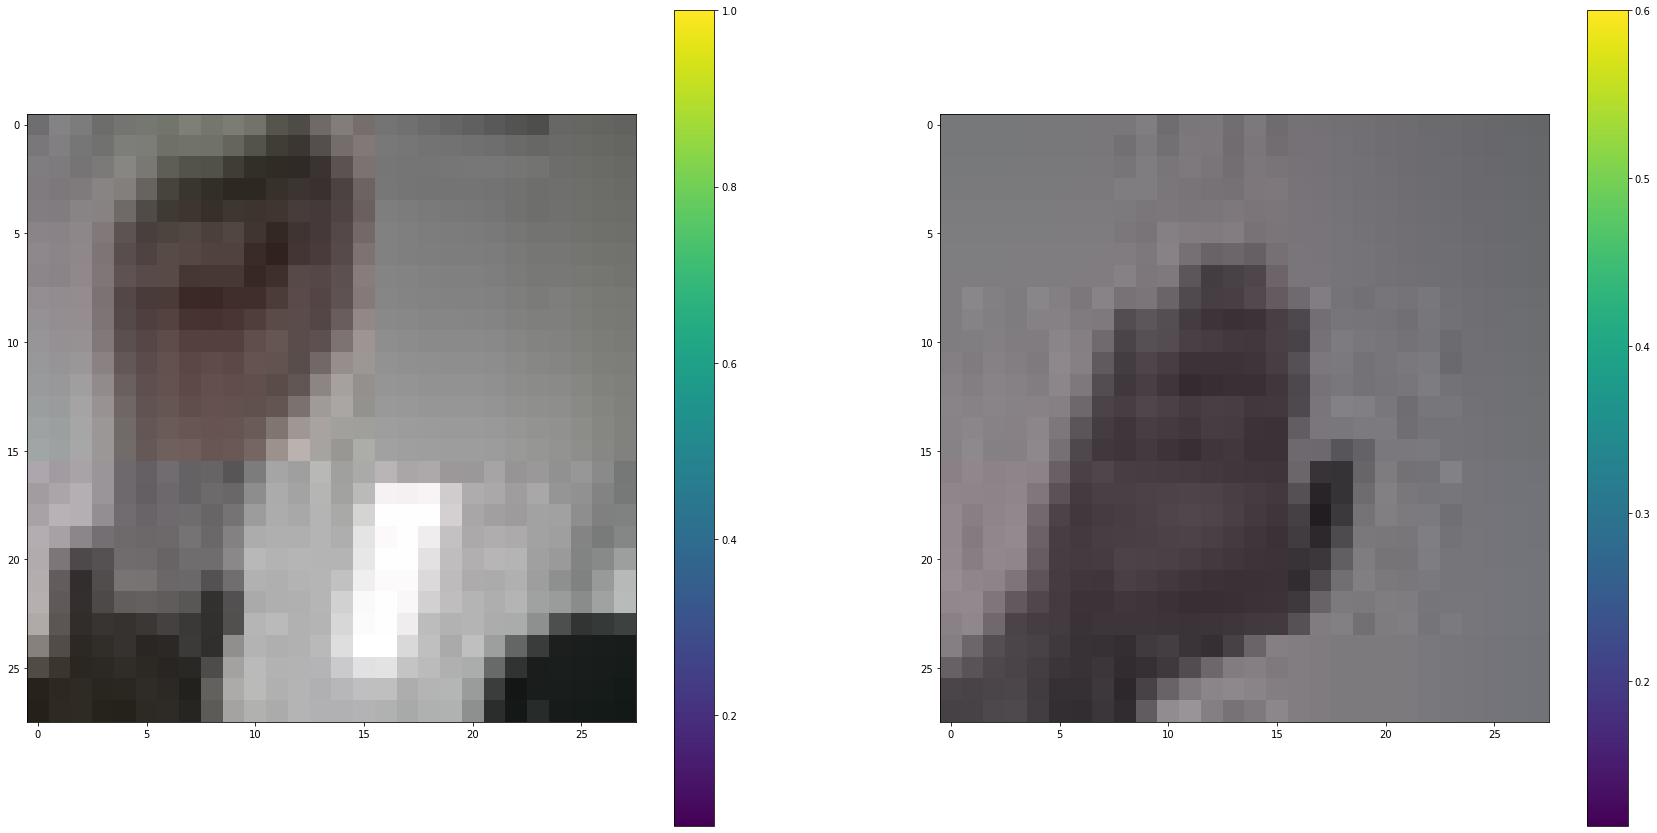

In [10]:
idx = 15
plt.figure(figsize =(30,15))
plt.subplot(121)
plt.imshow(x_train[idx])
plt.colorbar()
plt.subplot(122)
plt.imshow(x_test[idx])
plt.colorbar()
plt.show()

In [11]:
# reshape

x_train = x_train.reshape([x_train.shape[0],28*28*3])
x_test = x_test.reshape([x_test.shape[0],28*28*3])

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print('train',x_train.shape,'test',x_test.shape)
print('train',y_train.shape,'test',y_test.shape)

train (2641, 2352) test (661, 2352)
train (2641, 3) test (661, 3)


In [12]:
activation_function = 'relu'

input_layer = keras.layers.Input(shape = (28*28*3,))
x = keras.layers.Dense(1024,activation = activation_function,kernel_initializer=tf.keras.initializers.he_normal())(input_layer)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(512,activation = activation_function,kernel_initializer=tf.keras.initializers.he_normal())(x)
x = keras.layers.Dense(256,activation = activation_function,kernel_initializer=tf.keras.initializers.he_normal())(x)
x = keras.layers.Dense(128)(x)
output_layer = keras.layers.Dense(3,activation ='softmax')(x)

model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2352)]            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2409472   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387   

In [13]:
# 모델 컴파일
loss= tf.keras.losses.categorical_crossentropy
optimizer =tf.keras.optimizers.Adam()
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=metric)

In [14]:
y_train.shape

(2641, 3)

In [15]:

 #validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(x_train,y_train,epochs=200,batch_size = 50,verbose =2,validation_data=(x_test,y_test))

Epoch 1/200
53/53 - 3s - loss: 1.5923 - categorical_accuracy: 0.3514 - val_loss: 1.0897 - val_categorical_accuracy: 0.4160
Epoch 2/200
53/53 - 2s - loss: 1.0480 - categorical_accuracy: 0.4472 - val_loss: 0.9417 - val_categorical_accuracy: 0.5310
Epoch 3/200
53/53 - 2s - loss: 0.9735 - categorical_accuracy: 0.5222 - val_loss: 0.8800 - val_categorical_accuracy: 0.5764
Epoch 4/200
53/53 - 2s - loss: 0.8906 - categorical_accuracy: 0.5808 - val_loss: 0.7616 - val_categorical_accuracy: 0.6747
Epoch 5/200
53/53 - 2s - loss: 0.8223 - categorical_accuracy: 0.6206 - val_loss: 0.7480 - val_categorical_accuracy: 0.6551
Epoch 6/200
53/53 - 2s - loss: 0.7756 - categorical_accuracy: 0.6399 - val_loss: 0.7381 - val_categorical_accuracy: 0.6944
Epoch 7/200
53/53 - 2s - loss: 0.7864 - categorical_accuracy: 0.6263 - val_loss: 0.7253 - val_categorical_accuracy: 0.6354
Epoch 8/200
53/53 - 2s - loss: 0.6936 - categorical_accuracy: 0.6869 - val_loss: 0.7594 - val_categorical_accuracy: 0.6399
Epoch 9/200
53/5

21/21 [==============================] - 0s 9ms/step - loss: 0.5767 - categorical_accuracy: 0.7610

 Test rmse: 0.7610


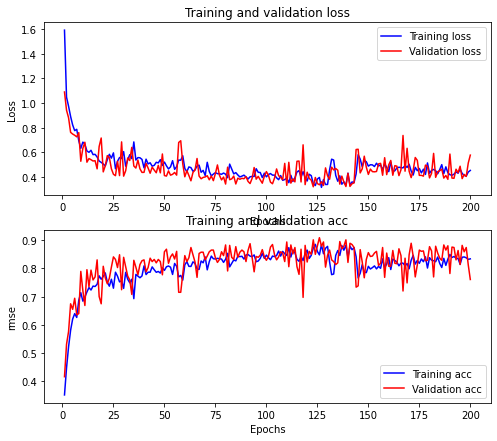

In [16]:
### loss와 val_loss를 그래프화
plt.figure(figsize = (8,7))
epochs = range(1, len(history.history['loss']) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, history.history['loss'], 'b-', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error val_mean_absolute_error key를 가지는 값들만 추출
rmse = history.history['categorical_accuracy']
val_rmse = history.history['val_categorical_accuracy']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'b-', label='Training acc')
plt.plot(epochs, val_rmse, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(x_test, y_test)[1]))


In [17]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img).convert('RGB')
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
 
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [18]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [19]:
x_test = x_test.reshape([x_test.shape[0],28*28*3])
y_test = keras.utils.to_categorical(y_test)

In [20]:
x_test[0:1,].shape

(1, 2352)

In [21]:
print(model.evaluate(x_test, y_test))

10/10 [==============================] - 0s 11ms/step - loss: 1.6203 - categorical_accuracy: 0.6000
[1.6202619075775146, 0.6000000238418579]


[[0.25487387 0.15297556 0.59215057]]


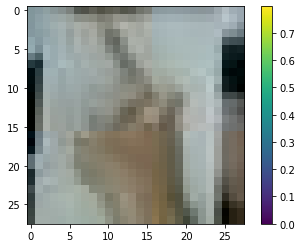

In [22]:
print(model.predict(x_test[0:1,]))
x_test_plot = x_test.reshape(x_test.shape[0],28,28,3)
plt.imshow(x_test_plot[0])
plt.colorbar()
plt.show()

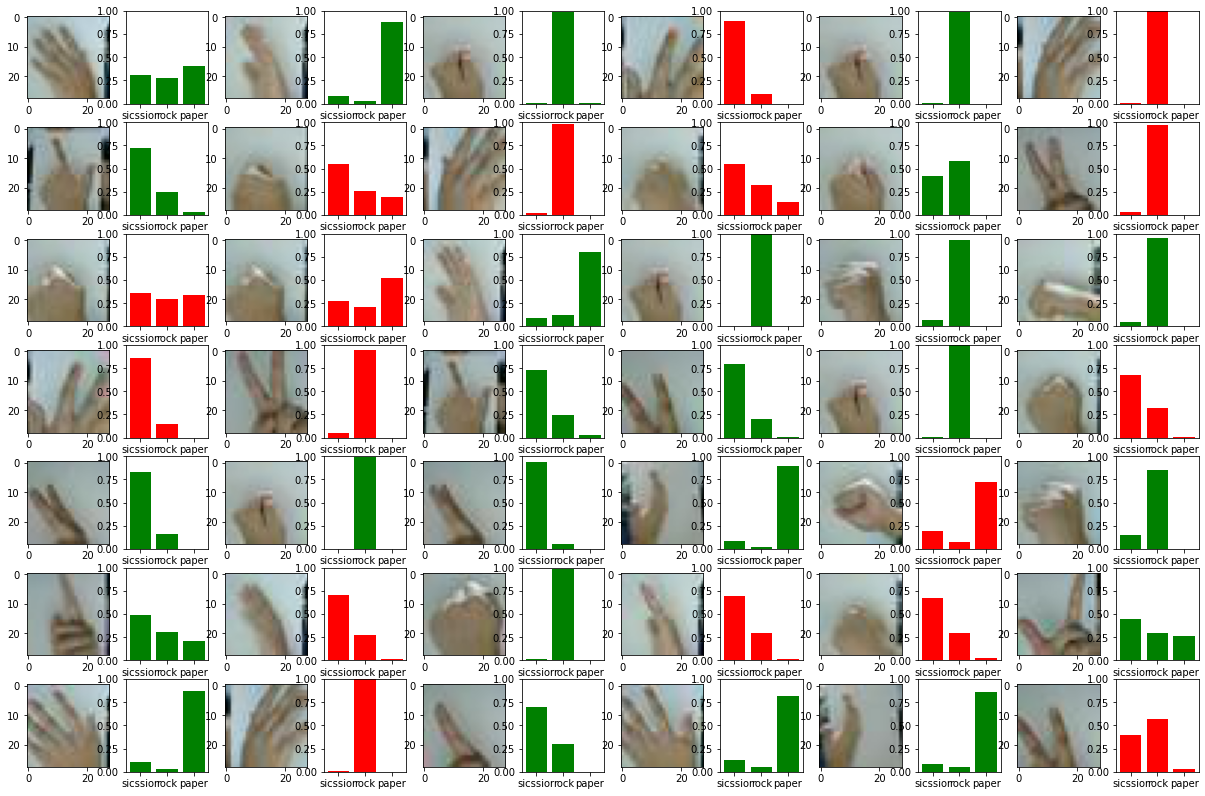

In [23]:
import random
def plot_scores(model, X, y, plane=4, width=3):
  predicted = model.predict(X)

  fig = plt.figure(figsize=(21, 14))
  plot_idx = 0
  for i in range(plane):
    for col in range(width):
      plot_idx += 2
      idx = random.randint(0, len(X))
      
      ax1 = fig.add_subplot(plane, 2 * width, plot_idx - 1)
      img_np = X[idx].reshape(28, 28, 3) * 255.
      ax1.imshow(Image.fromarray(img_np.astype('uint8'), 'RGB'))

      ans = np.argmax(y[idx])
      predicted_max = np.argmax(predicted[idx])

      color = None
      if ans == predicted_max:
        color = 'g'
      else:
        color = 'r'
      ax2 = fig.add_subplot(plane, 2 * width, plot_idx)
      ax2.bar(np.arange(0, y.shape[1]), predicted[idx], color=color)
      ax2.set_xticks(np.arange(0, y.shape[1]))
      ax2.set_xticklabels(['sicssior','rock','paper'])
      ax2.set_ylim((0., 1.))
  plt.show()

plot_scores(model, x_test, y_test, plane=7, width=6)